In [ ]:
# Characterisation can be done by changing settings to qibolab/runcards/tiiq.yml and examples/tii/diagnostics.yml
# These scripts do not save the characterisation results to the runcard; to do so use save_config_parameter:
#   ds.backup_config_file()
#   resonator_freq, avg_min_voltage, max_ro_voltage, smooth_dataset, dataset = ds.run_resonator_spectroscopy()
#   ds.save_config_parameter('resonator_freq', resonator_freq, 'characterization', 'single_qubit', qubit)

In [1]:
from qibolab.paths import script_folder
from qibolab import Platform
from qibolab.calibration import utils
from qibolab.calibration.calibration import Calibration as Diagnostics

diagnostics_settings = script_folder / "diagnostics.yml"

# Create a platform; connect and configure it
platform = Platform('tiiq')
platform.connect()
platform.setup()

# create a diagnostics/calibration object
ds = Diagnostics(platform, diagnostics_settings)

# select the qubit to be characterised
qubit = 0


[Qibo 0.1.8rc0|INFO|2022-07-27 23:58:46]: Loading platform tiiq from runcard c:\users\david fuentes ruiz\github\qibolab\src\qibolab\runcards\tiiq.yml
[Qibo 0.1.8rc0|INFO|2022-07-27 23:58:46]: Connecting to tiiq instrument qrm_rf.
[Qibo 0.1.8rc0|INFO|2022-07-27 23:58:49]: Connecting to tiiq instrument qcm_rf1.
[Qibo 0.1.8rc0|INFO|2022-07-28 00:00:41]: Creating MeasurementControl Calibration


In [ ]:
ds.backup_config_file()

Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:    166s | time left:      0s  
100% completed | elapsed time:    166s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:    376s | time left:      0s  
100% completed | elapsed time:    376s | time left:      0s  

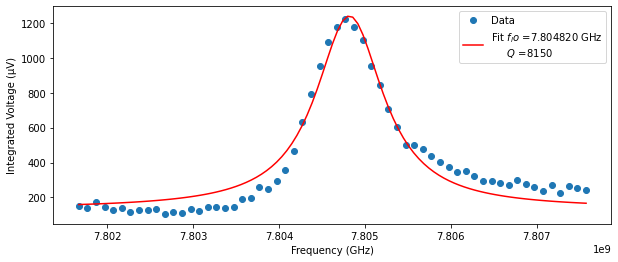


Resonator Frequency = 7824819841


In [2]:
resonator_freq, avg_voltage, peak_voltage, dataset = ds.run_resonator_spectroscopy(qubit)

In [11]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Resonator frequency: {resonator_freq}")
print(f"qrm_rf out0_in0_lo_freq: {resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency']}")

Average voltage: 248
Peak voltage: 1105
Resonator frequency: 7824819841
New out0_in0_lo_freq: 7804819841


In [ ]:
ds.save_config_parameter("resonator_freq", resonator_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_avg_ro_voltage", int(avg_voltage), 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("resonator_spectroscopy_peak_ro_voltage", int(peak_voltage), 'characterization', 'single_qubit', qubit)
lo_qrm_frequency = int(resonator_freq - platform.settings['native_gates']['single_qubit'][qubit]['MZ']['frequency'])
ds.save_config_parameter("out0_in0_lo_freq", lo_qrm_frequency, 'instruments', platform.qrm[qubit].name, 'settings')

Resonator Punchout

In [ ]:
dataset = ds.run_resonator_punchout(qubit)

Resonator Spectroscopy Flux

In [ ]:
dataset = ds.run_resonator_punchout(qubit, fluxline = 0)

Qubit Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:    104s | time left:      0s  
100% completed | elapsed time:    104s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:    283s | time left:      0s  
100% completed | elapsed time:    283s | time left:      0s  

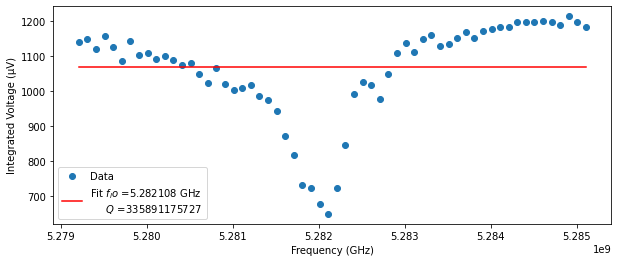


Qubit Frequency = 5082108297


In [5]:
qubit_freq, avg_voltage, peak_voltage, dataset = ds.run_qubit_spectroscopy(qubit)

In [6]:
print(f"Average voltage: {int(avg_voltage)}")
print(f"Peak voltage: {int(peak_voltage)}")
print(f"Qubit frequency: {qubit_freq}")
print(f"qcm_rf1 out0_in0_lo_freq: {qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']}")

Average voltage: 1135
Peak voltage: 0
Qubit frequency: 5082108297
qcm_rf1 out0_in0_lo_freq: 5282108297


In [ ]:
ds.save_config_parameter("qubit_freq", qubit_freq, 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
ds.save_config_parameter("qubit_spectroscopy_peak_ro_voltage", float(peak_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse length

Starting iterative measurement...
100% completed | elapsed time:   1337s | time left:      0s  
100% completed | elapsed time:   1337s | time left:      0s  
Pi pulse duration = 149.50409011641042

Pi pulse amplitude = 0.9

rabi oscillation peak voltage = 497


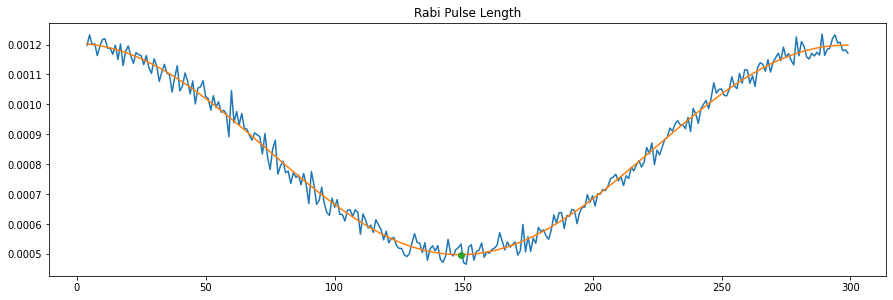

In [2]:
pi_pulse_duration, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_ro_voltage, dataset = ds.run_rabi_pulse_length(qubit)

In [10]:
print(f"Pi pulse duration: {pi_pulse_duration}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse duration: 149.50409011641042
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 497


In [ ]:
ds.save_config_parameter("duration", int(pi_pulse_duration), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("amplitude", float(pi_pulse_amplitude), 'native_gates', 'single_qubit', qubit, 'RX')
ds.save_config_parameter("rabi_oscillations_pi_pulse_peak_ro_voltage", float(rabi_oscillations_pi_pulse_peak_ro_voltage), 'characterization', 'single_qubit', qubit)

Rabi Oscillations with varying pulse gain

Starting iterative measurement...
100% completed | elapsed time:    269s | time left:      0s  
100% completed | elapsed time:    269s | time left:      0s  
Pi pulse gain = 0.23819567784402343

Pi pulse amplitude = 0.9

Pi pulse duration = 149

rabi oscillation peak voltage = 501


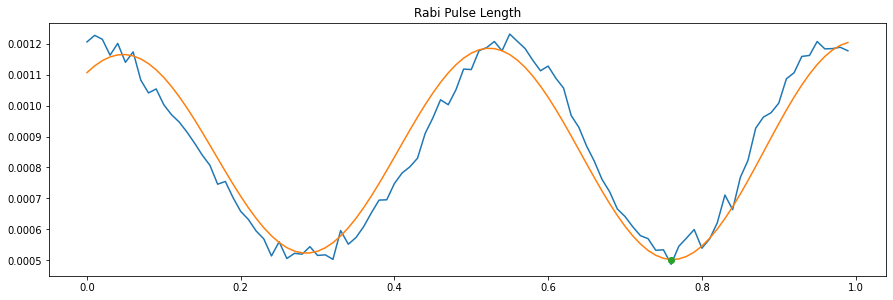

In [6]:
pi_pulse_gain, pi_pulse_amplitude, rabi_oscillations_pi_pulse_peak_voltage, dataset = ds.run_rabi_pulse_gain(qubit)

In [13]:
print(f"Pi pulse gain: {pi_pulse_gain}")
print(f"Pi pulse amplitude: {pi_pulse_amplitude}")
print(f"Rabi Oscillation pi pulse peak voltage: {rabi_oscillations_pi_pulse_peak_ro_voltage}")

Pi pulse gain: 0.23819567784402343
Pi pulse amplitude: 0.9
Rabi Oscillation pi pulse peak voltage: 497


T1

Starting iterative measurement...
100% completed | elapsed time:    370s | time left:      0s  
100% completed | elapsed time:    370s | time left:      0s  
T1 = 18180


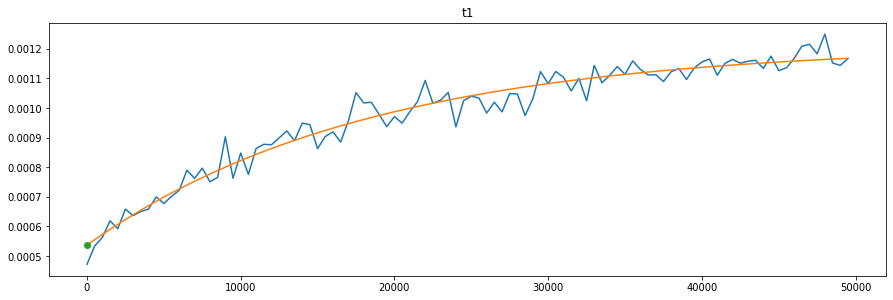

In [9]:
t1, dataset = ds.run_t1(qubit)

In [12]:
print(f"T1: {t1}")

T1: 18180


In [ ]:
ds.save_config_parameter("T1", float(t1), 'characterization', 'single_qubit', qubit)

Ramsey

Starting iterative measurement...
100% completed | elapsed time:   1351s | time left:      0s  
100% completed | elapsed time:   1351s | time left:      0s  
Delta Frequency = 549172.2372969593

Corrected Qubit Frequency = 5081559124

T2 = -297.1794339000268 ns


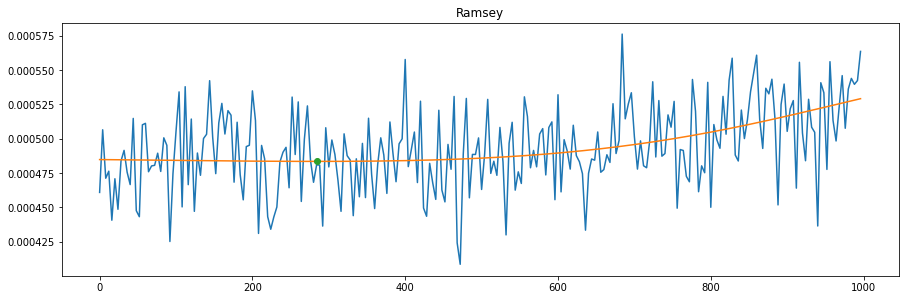

In [14]:
delta_frequency, corrected_qubit_frequency, t2, smooth_dataset, dataset = ds.run_ramsey(qubit)

In [15]:
print(f"Delta Frequency: {delta_frequency}")
print(f"Corrected qubit frequency: {corrected_qubit_frequency}")
print(f"T2: {t2}")

Delta Frequency: 549172.2372969593
Corrected qubit frequency: 5081559124
T2: -297.1794339000268


In [ ]:
#adjusted_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] + delta_frequency)
ds.save_config_parameter("qubit_freq", corrected_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
RX_pulse_sequence = platform.settings['native_gates']['single_qubit'][qubit]['RX']['pulse_sequence']
lo_qcm_frequency = int(corrected_qubit_freq + RX_pulse_sequence[0]['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_freq)

Ramsey freq

In [17]:
t2, delta_phys, corrected_qubit_freq, smooth_dataset, dataset = ds.run_ramsey_freq(qubit)

Starting iterative measurement...
100% completed | elapsed time:    690s | time left:      0s  
100% completed | elapsed time:    690s | time left:      0s  

In [ ]:
ds.save_config_parameter("qubit_freq", corrected_qubit_freq, 'characterization', 'single_qubit', qubit)
ds.save_config_parameter("T2", float(t2), 'characterization', 'single_qubit', qubit)
lo_qcm_frequency = int(corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency'])
ds.save_config_parameter("out0_lo_freq", lo_qcm_frequency, 'instruments', platform.lo_qcm[qubit].name, 'settings')
print(corrected_qubit_freq)

In [23]:
corrected_qubit_freq = int(platform.settings['characterization']['single_qubit'][qubit]['qubit_freq'] - delta_phys)
print(f"Delta Frequency: {delta_phys}")
print(f"Corrected qubit frequency: {corrected_qubit_freq}")
lo_qcm_frequency = corrected_qubit_freq + platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
print(f"Corrected out0_lo_freq: {lo_qcm_frequency}")
print(f"T2: {t2}")

Delta Frequency: -65426.71269603493
Corrected qubit frequency: 5082173723
Corrected out0_lo_freq: 5282173723
T2: 4766.689144856866


allXY

In [ ]:
results, gateNumber = ds.allXY(qubit)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

Drag Pulse Beta Parameter Tunning

In [ ]:
beta_optimal = ds.run_drag_pulse_tunning(qubit)

In [ ]:
print(f"Beta optimal: {beta_optimal}")
print(f"Drag Shape: Drag(5, {beta_optimal})")

In [ ]:
beta= -1.1
qd_duration = platform.settings['native_gates']['single_qubit'][qubit]['RX']['duration'] 
qd_frequency = platform.settings['native_gates']['single_qubit'][qubit]['RX']['frequency']
qd_amplitude = platform.settings['native_gates']['single_qubit'][qubit]['RX']['amplitude'] / 2
qd_shape = platform.settings['native_gates']['single_qubit'][qubit]['RX']['drag_shape']
#TODO: Replace with drag shape stored in Runcard when c
if (beta != None):
    qd_shape = 'Drag(5,'+ str(beta)+')'        
        
qd_channel = platform.settings['qubit_channel_map'][qubit][1]
print (qd_duration)
print (qd_frequency)
print (qd_amplitude)
print (qd_shape)

from qibolab.pulses import Pulse
drag = Pulse(0, qd_duration, qd_amplitude, qd_frequency, 0, qd_shape, qd_channel)
print(drag.shape)

In [18]:
import re
shape = 'Drag(5,-1.001)'
shape_name = re.findall('(\w+)', shape)[0]
shape_parameters = re.findall('(\w+)', shape)[1:]
print(shape_name)
print(shape_parameters)

Drag
['5', '1', '001']


allXY With Drag Pulse

In [ ]:
# Modify [native_gates][single_qubit][qubit][RX][shape] to Drag(5, beta_optimal)
# before launch again allXY
# Do it manually until you trust Drag Pulse Beta Parameter Tunning
results, gateNumber = ds.allXY(qubit)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results, gateNumber)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

plt.plot(results)
plt.ylabel('Z projection probability of qubit state |o>')
plt.show()

Dispersive Shift Resonator Spectroscopy

Starting iterative measurement...
100% completed | elapsed time:     78s | time left:      0s  
100% completed | elapsed time:     78s | time left:      0s  

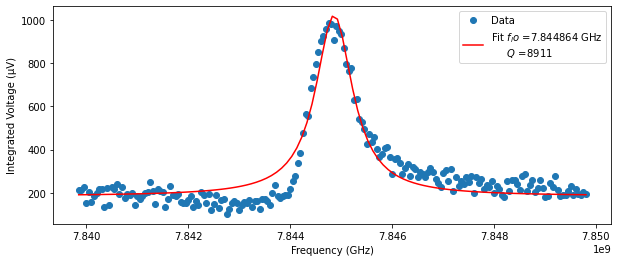

Starting iterative measurement...
100% completed | elapsed time:     83s | time left:      0s  
100% completed | elapsed time:     83s | time left:      0s  

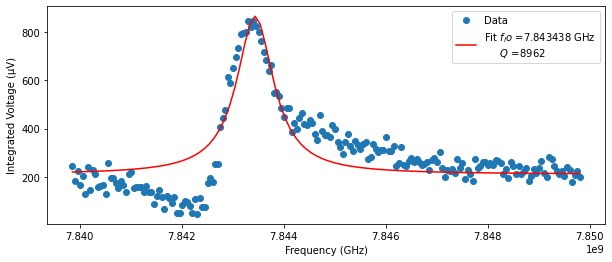


Resonator Frequency = 7864864319

Shifted Frequency = 7863437571

Dispersive Shift = -1426748


In [16]:
shifted_resonator_freq, dispersive_shift, peak_voltage, dataset = ds.run_dispersive_shift(qubit)

Spin Echo

In [ ]:
# Spin Echo: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - readout
dataset = ds.run_spin_echo(qubit)

In [ ]:
# Spin Echo 3 Pulses: RX(pi/2) - wait t(rotates z) - RX(pi) - wait t(rotates z) - RX(pi/2) - readout
dataset = ds.run_spin_echo_3pulses(qubit)

Qubit states classification

In [6]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.calibrate_qubit_states(qubit)

Starting exc state calibration 0
Finished exc single shot execution  0
Starting exc state calibration 1
Finished exc single shot execution  1
Starting exc state calibration 2
Finished exc single shot execution  2
Starting exc state calibration 3
Finished exc single shot execution  3
Starting exc state calibration 4
Finished exc single shot execution  4
Starting exc state calibration 5
Finished exc single shot execution  5
Starting exc state calibration 6
Finished exc single shot execution  6
Starting exc state calibration 7
Finished exc single shot execution  7
Starting exc state calibration 8
Finished exc single shot execution  8
Starting exc state calibration 9
Finished exc single shot execution  9
Starting exc state calibration 10
Finished exc single shot execution  10
Starting exc state calibration 11
Finished exc single shot execution  11
Starting exc state calibration 12
Finished exc single shot execution  12
Starting exc state calibration 13
Finished exc single shot execution  1

In [8]:
mean_gnd_states, mean_exc_states

((-0.0008313786783245074+0.00044815319987281076j),
 (-0.00022773024569023835+0.0003203066357136082j))

[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 

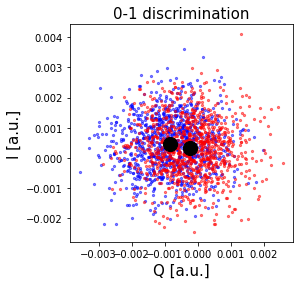

In [9]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)